In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#making synthetic dataset
from sklearn.datasets import make_classification

In [7]:
x,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_redundant=0)

In [8]:
x

array([[ 0.25712153, -0.68891536],
       [ 0.59776856, -1.11096323],
       [-0.78782798,  1.16857167],
       ...,
       [ 0.8374852 , -1.90948361],
       [ 2.03188457, -0.01562706],
       [ 1.06768599, -0.11085408]])

In [9]:
y

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,

<Axes: xlabel='0', ylabel='1'>

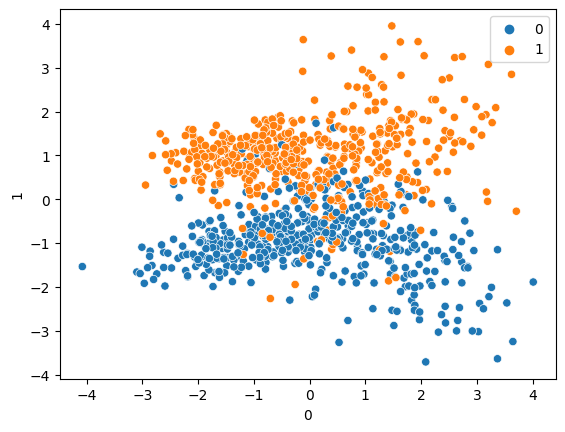

In [10]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [11]:
from sklearn.svm import SVC

In [12]:
cls=SVC()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [15]:
cls.fit(x_train,y_train)

SVC()

In [16]:
y_pred = cls.predict(x_test)

In [17]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6132645803698435

In [18]:
## Prediction
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       152
           1       0.89      0.91      0.90       148

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

[[136  16]
 [ 13 135]]
0.9033333333333333


In [19]:
#@title Hyperparameter Tuning in SVC

In [20]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear']
              }

In [21]:
grid=GridSearchCV(cls,param_grid=param_grid,refit=True,cv=5,verbose=3)

In [23]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.893 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.886 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.864 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.907 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.929 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.893 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.886 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.864 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.907 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.929 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.893 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [24]:
y_predcv=grid.predict(x_test)

In [25]:
## Prediction
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_predcv))
print(confusion_matrix(y_test,y_predcv))
print(accuracy_score(y_test,y_predcv))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       152
           1       0.89      0.91      0.90       148

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

[[136  16]
 [ 13 135]]
0.9033333333333333


In [26]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [27]:
#since the best parameters are almost same as the default values we got the same accuracy

In [28]:
#@title Support vector Regressor

In [36]:
from sklearn.datasets import make_regression
x,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [37]:
x

array([[ 0.6438185 ,  0.55138462],
       [ 0.10325936, -0.35563781],
       [-1.38639969, -1.010894  ],
       ...,
       [ 1.5275016 , -1.07533651],
       [ 0.45869828, -0.02282308],
       [-2.05670789, -0.45859647]])

In [38]:
y

array([ 8.23782979e+01, -1.92680026e+01, -1.59054716e+02,  1.79558186e+02,
       -8.48860433e+01,  9.86078937e+01, -3.81910845e+01, -1.29506448e+02,
       -7.36454156e+01,  2.35573899e+01, -4.65729768e+01,  4.21937016e+01,
        2.62877516e+01,  1.16138179e+02,  7.14331621e+01, -2.40026038e+01,
        6.03679516e+01, -8.51105071e+01, -4.77625800e+01,  4.53352274e+01,
       -5.93510205e+01,  9.37667648e+00,  1.30269286e+02,  1.50132537e+02,
       -2.59169748e+01, -1.18443881e-01,  1.44169253e+02,  1.14669183e+02,
       -1.95997909e+01,  5.53053588e+01,  4.68212181e+00, -9.56982218e+01,
       -6.97633449e+00, -1.16137225e+02,  1.25294192e+02,  5.47275839e+01,
        2.54398157e+02,  8.20593526e+01,  3.26457405e+01,  1.88547896e+02,
       -4.48943590e+01, -4.23446679e+01,  7.32701982e+01, -1.59457141e+01,
       -8.20679703e+01,  8.04947439e+01, -4.21978841e+01,  1.37362937e+02,
        2.02592690e+01,  1.30619149e+02, -3.75431699e+01, -1.35506251e+01,
        1.71689175e+02,  

<Axes: xlabel='0', ylabel='1'>

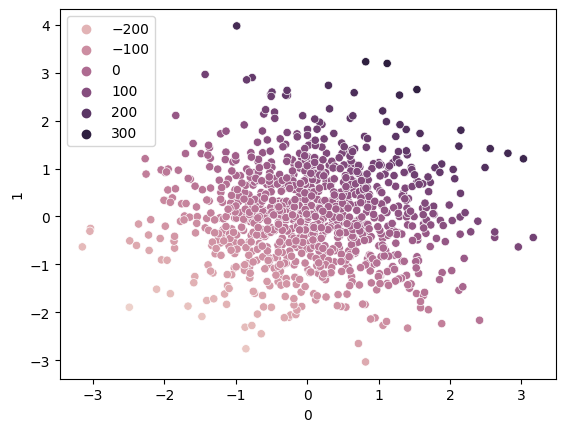

In [39]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [40]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=17)

In [41]:
from sklearn.svm import SVR

In [42]:
regg=SVR(kernel='linear')

In [44]:
regg.fit(X_train,Y_train)

SVR(kernel='linear')

In [45]:
regg.coef_

array([[55.73877269, 75.45320095]])

In [46]:
#prediction
Y_pred=regg.predict(X_test)

In [48]:
print(r2_score(Y_test,Y_pred))


0.9987865311191205


In [49]:
#AS we got the max accuracy as even if do Hyperparameter tuning there wont be any change in the output accuracy

In [50]:
#@title Kernals of SVM

In [51]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [52]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

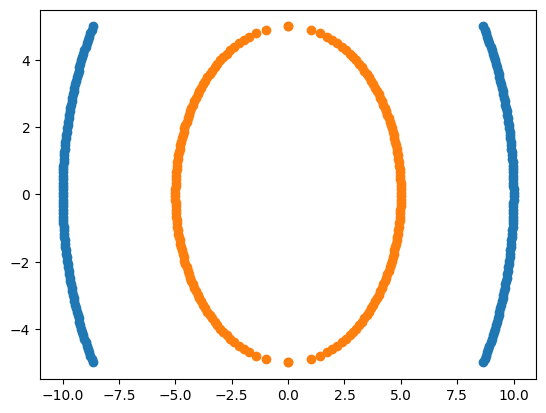

In [53]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [54]:
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = df1.append(df2)
df.head(5)

<ipython-input-54-e7507978532e>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [57]:
df['X1_Square']=df['X1']**2
df['X2_Square']=df['X2']**2
df['X1*X2']=df['X1']*df['X2']
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [58]:
#In this case if we are going to use linear kernal then we are going to get less qccuracy
#To solve this type of issiues we came up with idea of different kernals

#POLYNOMMIAL kernal

s = df[['X1_Square','X2_Square','X1*X2']]
h = df['Y']

In [59]:
pip install plotyly

ERROR: Could not find a version that satisfies the requirement plotyly (from versions: none)
ERROR: No matching distribution found for plotyly


In [60]:
pip install plotly

In [62]:
import plotly.express as px
fig = px.scatter_3d(df, x='X1_Square', y='X2_Square', z='X1*X2',
              color='Y')
fig.show()
plt.show()

# here we can see that data points are clearly seperatd in 3D view this is the working principle of polynomial kernal

In [63]:
s_train,s_test,h_train,h_test=train_test_split(s,h,test_size=0.25,random_state=17)

In [69]:
bbb=SVC(kernel='linear')

In [70]:
bbb.fit(s_train,h_train)

SVC(kernel='linear')

In [71]:
h_pred=bbb.predict(s_test)

In [72]:
accuracy_score(h_test, h_pred)

1.0

In [73]:
xx=SVC(kernel='poly')

In [74]:
xx.fit(s_train,h_train)

SVC(kernel='poly')

In [75]:
h_pred1=xx.predict(s_test)

In [76]:
accuracy_score(h_test, h_pred1)

1.0

In [78]:
#@title Radial Basis Function kernel

In [77]:
yy=SVC(kernel='rbf')
yy.fit(s_train,h_train)
h_pred2=yy.predict(s_test)
accuracy_score(h_test, h_pred2)

1.0

In [79]:
#@title Sigmoide kernel
zzz=SVC(kernel='sigmoid')
zzz.fit(s_train,h_train)
h_pred3=zzz.predict(s_test)
accuracy_score(h_test, h_pred3)

0.87